# **Title:Predicting Malaria and Dengue Case Counts**

# **Problem Statement:**

This project uses machine learning to predict malaria and dengue cases based on climate variables temperature, precipitation, UV index, air quality and socioeconomic factors population density, healthcare budget. By analyzing historical data across regions and time, the model supports outbreak forecasting, public health planning, and resource allocation.

# **Goals:**

* Predict malaria and dengue case counts.

* Identify key factors influencing disease spread.

# **objectives:**

* Predict Disease Cases

* Analyze Influencing Factors

* Analyze Trends

* Create Interactive Visualization

Source Of Dataset :https://www.kaggle.com/datasets/hopeofchange/climate-driven-disease-spread/data

# **Understand the Data**

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**load Dataset**

In [193]:
data = pd.read_csv('/content/climate_disease_dataset.csv')
df = pd.DataFrame(data)
df

,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
0,2000,1,Palestinian Territory,Central,28.132468,152.083870,110.487231,12.000000,53,145,113,1068
1,2000,2,Palestinian Territory,Central,30.886500,119.591418,83.467928,12.000000,132,48,113,1068
2,2000,3,Palestinian Territory,Central,31.366433,95.876124,93.095292,12.000000,34,80,113,1068
3,2000,4,Palestinian Territory,Central,28.481870,175.315731,105.530192,9.395894,23,133,113,1068
4,2000,5,Palestinian Territory,Central,26.890370,191.445990,60.205979,9.935726,39,74,113,1068
...,...,...,...,...,...,...,...,...,...,...,...,...
34555,2023,8,Philippines,East,13.040751,369.269763,70.218442,12.000000,149,36,52,399
34556,2023,9,Philippines,East,9.811456,271.028130,74.749481,8.432640,56,47,52,399
34557,2023,10,Philippines,East,12.308443,228.392496,91.096407,8.034754,104,22,52,399
34558,2023,11,Philippines,East,20.197689,196.673067,128.859240,12.000000,142,66,52,399


**check null values**

In [194]:
df.isnull().sum()

,0
year,0
month,0
country,0
region,0
avg_temp_c,0
precipitation_mm,0
air_quality_index,0
uv_index,0
malaria_cases,0
dengue_cases,0


In [195]:
df.duplicated().sum()

np.int64(0)

**Get a quick summary of the dataset**

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34560 entries, 0 to 34559
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                34560 non-null  int64  
 1   month               34560 non-null  int64  
 2   country             34560 non-null  object 
 3   region              34560 non-null  object 
 4   avg_temp_c          34560 non-null  float64
 5   precipitation_mm    34560 non-null  float64
 6   air_quality_index   34560 non-null  float64
 7   uv_index            34560 non-null  float64
 8   malaria_cases       34560 non-null  int64  
 9   dengue_cases        34560 non-null  int64  
 10  population_density  34560 non-null  int64  
 11  healthcare_budget   34560 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 3.2+ MB


**view number of rows and columns in dataset.**


In [197]:
df.shape

(34560, 12)

 **To quickly get a summary of important statistical details about the numeric columns in a DataFrame.**

In [198]:
df.describe()

,year,month,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
count,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000
mean,2011.500000,6.500000,20.395234,192.667977,43.787766,10.210855,70.519560,75.941464,266.900000,2764.650000
std,6.922287,3.452102,8.410940,90.503990,33.079697,1.936540,46.130774,37.323807,136.001073,1418.119148
min,2000.000000,1.000000,-2.557056,0.000000,0.000000,0.870704,0.000000,0.000000,50.000000,205.000000
25%,2005.750000,3.750000,14.404089,124.641424,15.322767,8.921094,32.000000,48.000000,136.250000,1435.500000
50%,2011.500000,6.500000,20.351749,195.315309,40.685931,10.760990,69.000000,76.000000,277.500000,2859.000000
75%,2017.250000,9.250000,26.342978,260.147603,68.402041,12.000000,107.000000,104.000000,384.750000,3996.750000
max,2023.000000,12.000000,44.583564,485.704079,168.847690,12.000000,201.000000,181.000000,498.000000,4969.000000


# **Data Cleaning**

In [199]:
# df.drop(['dengue_cases'], axis=1, inplace= True)

# **Data Visualization**

**Visualize the distribution of malaria cases and understand its shape**

<Axes: xlabel='malaria_cases', ylabel='Count'>

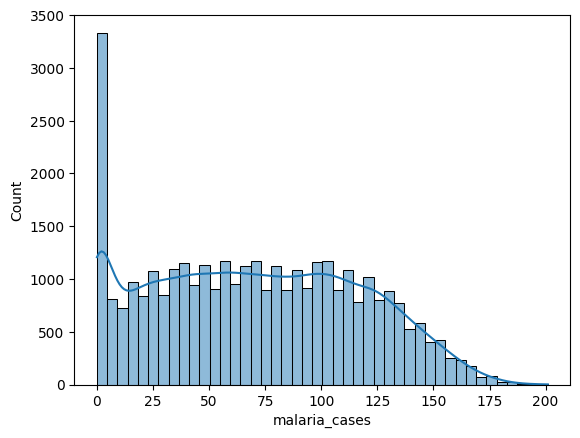

In [200]:
sns.histplot(df['malaria_cases'],kde=True)

**To visualize the frequency and distribution pattern of dengue cases in the dataset.**



<Axes: xlabel='dengue_cases', ylabel='Count'>

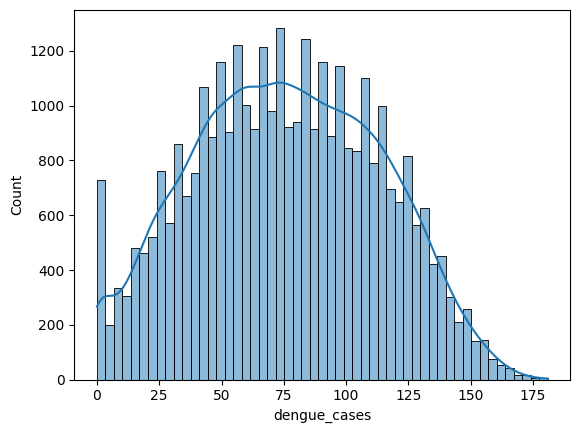

In [201]:
sns.histplot(df['dengue_cases'],kde=True)

**To compare the yearly trends of malaria and dengue cases visually.**



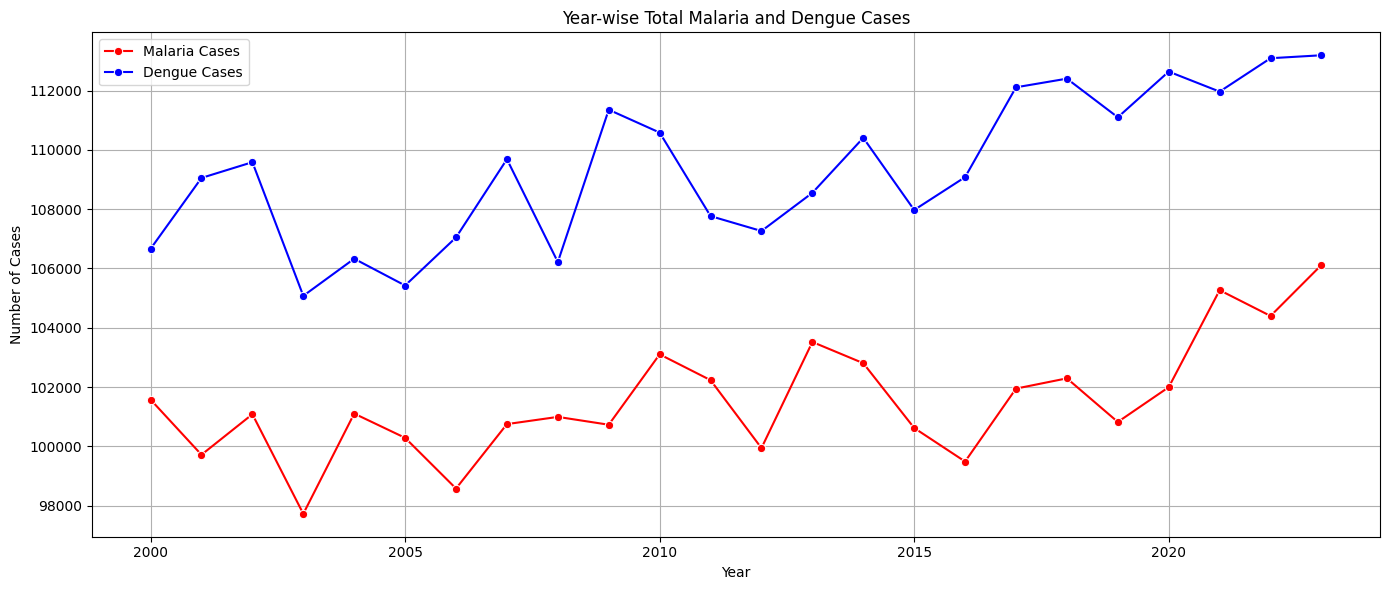

In [202]:
# Group by year and sum malaria & dengue cases
yearly_cases = df.groupby('year')[['malaria_cases', 'dengue_cases']].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))

# Malaria
sns.lineplot(data=yearly_cases, x='year', y='malaria_cases', marker='o', label='Malaria Cases', color='red')

# Dengue
sns.lineplot(data=yearly_cases, x='year', y='dengue_cases', marker='o', label='Dengue Cases', color='blue')

# Formatting
plt.title("Year-wise Total Malaria and Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**To identify the countries with the highest total rainfall visually**

<ipython-input-203-1728f69ca94a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_precipitation.values, y=top_10_precipitation.index, palette="coolwarm")


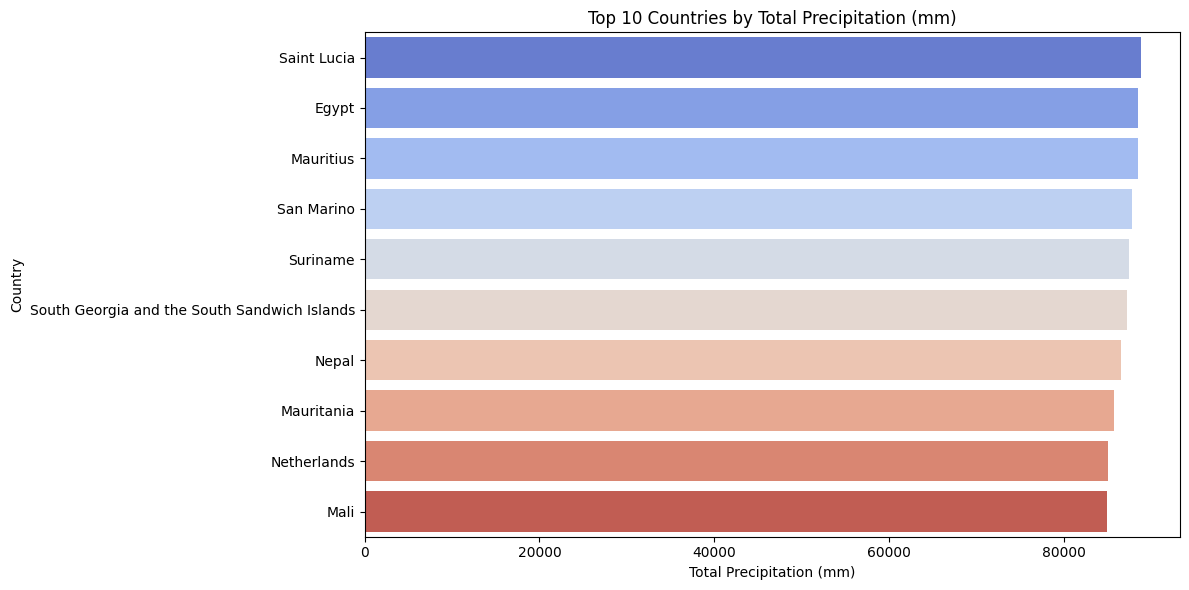

In [203]:
# Group by country and get total precipitation
top_10_precipitation = df.groupby('country')['precipitation_mm'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_precipitation.values, y=top_10_precipitation.index, palette="coolwarm")
plt.title("Top 10 Countries by Total Precipitation (mm)")
plt.xlabel("Total Precipitation (mm)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


**To compare and highlight the countries most affected by malaria and dengue**

<ipython-input-204-633ec4c1726e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_malaria.values, y=top_10_malaria.index, ax=axes[0], palette="Reds_r")
<ipython-input-204-633ec4c1726e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_dengue.values, y=top_10_dengue.index, ax=axes[1], palette="Blues_r")


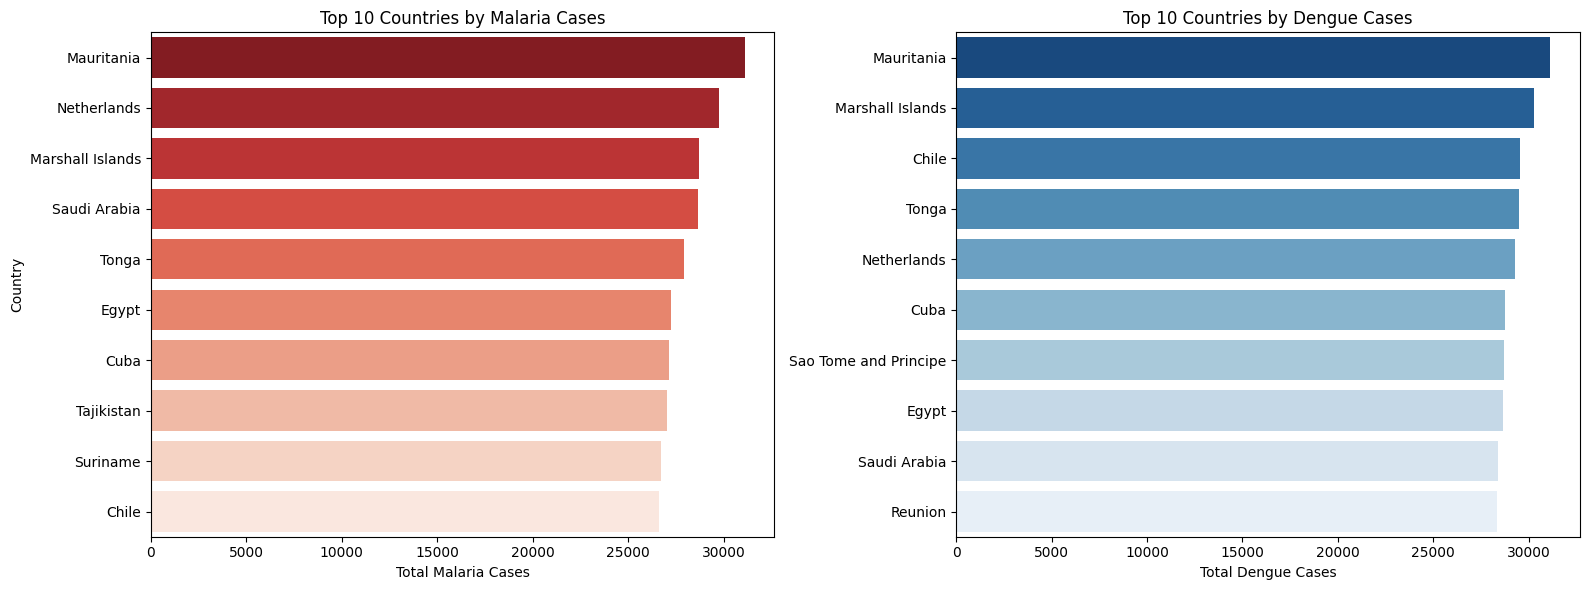

In [204]:
# Top 10 countries by malaria cases
top_10_malaria = df.groupby('country')['malaria_cases'].sum().sort_values(ascending=False).head(10)

# Top 10 countries by dengue cases
top_10_dengue = df.groupby('country')['dengue_cases'].sum().sort_values(ascending=False).head(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Malaria Plot
sns.barplot(x=top_10_malaria.values, y=top_10_malaria.index, ax=axes[0], palette="Reds_r")
axes[0].set_title("Top 10 Countries by Malaria Cases")
axes[0].set_xlabel("Total Malaria Cases")
axes[0].set_ylabel("Country")

# Dengue Plot
sns.barplot(x=top_10_dengue.values, y=top_10_dengue.index, ax=axes[1], palette="Blues_r")
axes[1].set_title("Top 10 Countries by Dengue Cases")
axes[1].set_xlabel("Total Dengue Cases")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

**To explore relationships between environmental factors and disease spread.**



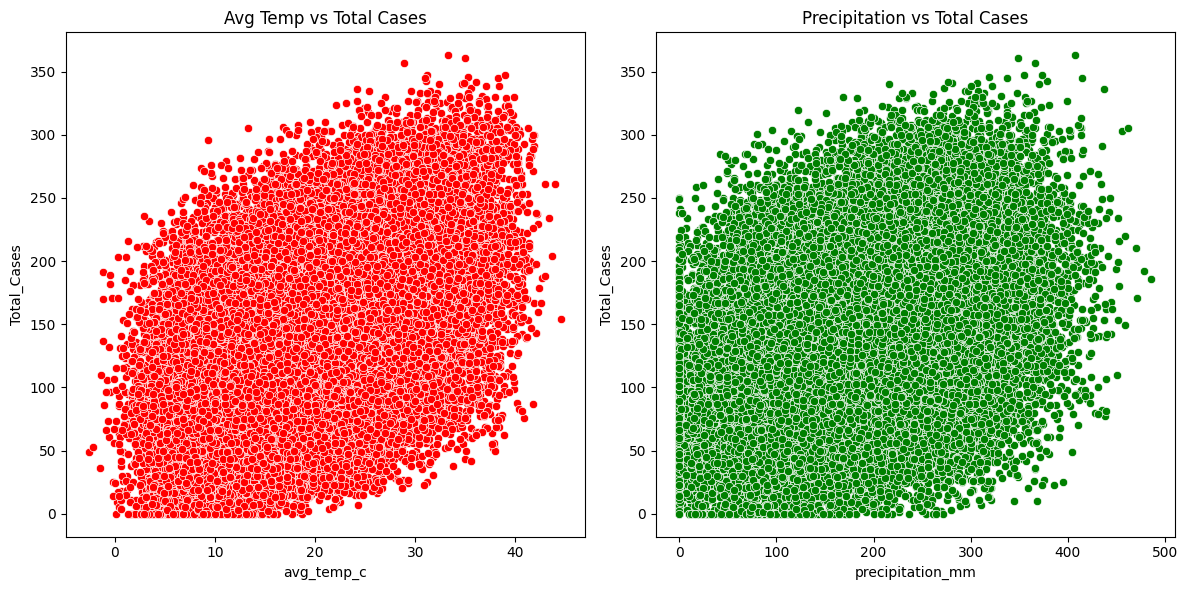

In [205]:
# Calculate Total_Cases before using it in the scatterplot
df['Total_Cases'] = df['malaria_cases'] + df['dengue_cases']

# Bivariate analysis: climate features vs Total_Cases
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjusted subplots
axes = axes.flatten()

# Scatter plots: environmental variables vs Total_Cases
sns.scatterplot(data=df, x='avg_temp_c', y='Total_Cases', ax=axes[0], color='red')
axes[0].set_title('Avg Temp vs Total Cases')

sns.scatterplot(data=df, x='precipitation_mm', y='Total_Cases', ax=axes[1], color='green')
axes[1].set_title('Precipitation vs Total Cases')

plt.tight_layout()
plt.show()

**To visually explore relationships, patterns, and correlations between multiple variables**.



In [206]:
# sns.pairplot(df)

In [207]:
df['country'].unique()

array(['Palestinian Territory', 'Macao',
       'Antarctica (the territory South of 60 deg S)', 'Slovenia',
       'Saint Helena', 'Japan', 'Saint Lucia', 'United Arab Emirates',
       'French Polynesia', 'Colombia', 'Pakistan', 'Belgium',
       'Turkmenistan', 'Portugal', 'Poland', 'Saint Kitts and Nevis',
       'Papua New Guinea', 'Chad', 'Slovakia (Slovak Republic)',
       'Grenada', 'Dominican Republic', 'Malta', 'Ireland', 'Liberia',
       'Lesotho', 'Isle of Man', 'Pitcairn Islands', 'Korea', 'Congo',
       'Morocco', 'American Samoa', 'Kenya', 'Sweden', 'New Caledonia',
       'Palau', 'Cyprus', 'Guyana', 'Djibouti', 'Bahamas', 'Reunion',
       'El Salvador', 'Montserrat', 'Sao Tome and Principe',
       'Saudi Arabia', 'Togo', 'Guam', 'South Africa', 'Serbia', 'Iran',
       'Uzbekistan', 'Israel', 'Wallis and Futuna', 'Hong Kong',
       'Dominica', 'Guinea-Bissau', 'Tuvalu', 'Mauritania', 'Micronesia',
       'Mozambique', 'Zimbabwe', 'French Guiana', 'Ethiopia', 'Camb

**To convert the categorical 'country' data into numerical format for machine learning models**

In [208]:
# # Step 1: Compute mean of the target variable for each country
# target_mean = df.groupby('country')['Total_Cases'].mean()

# # Step 2: Map the means back to the country column
# df['country_encoded'] = df['country'].map(target_mean)





In [209]:
df.drop('country', axis=1, inplace=True)


In [210]:
df['region'].unique()

array(['Central', 'North', 'South', 'West', 'East'], dtype=object)

**To convert categorical region names into numeric values for analysis or machine learning models.**



In [211]:
!pip install scikit-learn --upgrade # upgrading the sklearn
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False for a dense output

# Fit and transform the data
encoded_data = encoder.fit_transform(df[['region']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['region']))

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Optionally, drop the original 'region' column
df = df.drop('region', axis=1)


In [212]:
df

,year,month,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget,Total_Cases,region_Central,region_East,region_North,region_South,region_West
0,2000,1,28.132468,152.083870,110.487231,12.000000,53,145,113,1068,198,1.0,0.0,0.0,0.0,0.0
1,2000,2,30.886500,119.591418,83.467928,12.000000,132,48,113,1068,180,1.0,0.0,0.0,0.0,0.0
2,2000,3,31.366433,95.876124,93.095292,12.000000,34,80,113,1068,114,1.0,0.0,0.0,0.0,0.0
3,2000,4,28.481870,175.315731,105.530192,9.395894,23,133,113,1068,156,1.0,0.0,0.0,0.0,0.0
4,2000,5,26.890370,191.445990,60.205979,9.935726,39,74,113,1068,113,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34555,2023,8,13.040751,369.269763,70.218442,12.000000,149,36,52,399,185,0.0,1.0,0.0,0.0,0.0
34556,2023,9,9.811456,271.028130,74.749481,8.432640,56,47,52,399,103,0.0,1.0,0.0,0.0,0.0
34557,2023,10,12.308443,228.392496,91.096407,8.034754,104,22,52,399,126,0.0,1.0,0.0,0.0,0.0
34558,2023,11,20.197689,196.673067,128.859240,12.000000,142,66,52,399,208,0.0,1.0,0.0,0.0,0.0


# **Correlation Analysis**

**To identify potential correlations between different numerical features in the dataset, useful for feature selection and analysis**

In [213]:
correlation=df.corr()
correlation

,year,month,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget,Total_Cases,region_Central,region_East,region_North,region_South,region_West
year,1.000000e+00,-4.172551e-16,0.082336,-0.003252,-0.275368,-0.004289,0.018529,0.034830,7.955212e-14,1.199888e-13,0.033123,-4.918556e-14,-6.863021e-14,8.805964e-14,-2.916231e-14,4.538208e-14
month,-4.172551e-16,1.000000e+00,-0.513563,0.020827,0.000427,0.011316,-0.128766,-0.228934,8.169150e-16,1.034550e-15,-0.222662,-2.881881e-16,-5.064695e-16,7.739962e-16,-1.417570e-16,8.159308e-17
avg_temp_c,8.233597e-02,-5.135628e-01,1.000000,-0.015348,0.036301,0.425900,0.259014,0.451270,-6.155400e-03,-7.491146e-02,0.442589,-7.971269e-03,-1.554358e-02,1.869848e-03,-9.696981e-02,1.074084e-01
precipitation_mm,-3.252118e-03,2.082693e-02,-0.015348,1.000000,0.075877,0.045008,0.285629,0.245269,4.320016e-02,-9.683816e-02,0.343270,-1.026625e-01,1.137241e-01,2.791131e-03,4.794089e-03,5.138969e-03
air_quality_index,-2.753680e-01,4.271269e-04,0.036301,0.075877,1.000000,0.065294,0.146599,0.130763,-1.950078e-01,-7.880899e-01,0.178982,2.556605e-03,7.658256e-02,-1.316524e-01,6.244071e-04,6.008207e-02
uv_index,-4.289439e-03,1.131601e-02,0.425900,0.045008,0.065294,1.000000,0.132725,0.209896,8.154208e-04,-7.941659e-02,0.214546,-1.408792e-02,-1.109173e-02,-3.121466e-03,-8.375494e-02,1.023103e-01
malaria_cases,1.852898e-02,-1.287662e-01,0.259014,0.285629,0.146599,0.132725,1.000000,0.206398,-2.806226e-02,-1.876551e-01,0.827549,-2.171455e-02,3.573347e-02,-2.117947e-02,-2.637154e-02,3.757460e-02
dengue_cases,3.482976e-02,-2.289344e-01,0.451270,0.245269,0.130763,0.209896,0.206398,1.000000,-1.964400e-02,-1.772765e-01,0.720110,-2.419040e-02,3.673975e-02,-2.014199e-02,-4.544644e-02,5.585592e-02
population_density,7.955212e-14,8.169150e-16,-0.006155,0.043200,-0.195008,0.000815,-0.028062,-0.019644,1.000000e+00,2.471803e-01,-0.031170,1.318728e-01,-1.885203e-01,3.131148e-02,6.225531e-02,-6.962211e-02
healthcare_budget,1.199888e-13,1.034550e-15,-0.074911,-0.096838,-0.788090,-0.079417,-0.187655,-0.177277,2.471803e-01,1.000000e+00,-0.234784,-4.609436e-03,-9.793610e-02,1.645748e-01,6.220183e-03,-7.852856e-02


**To visually inspect correlations between numerical features and identify highly correlated variables.**



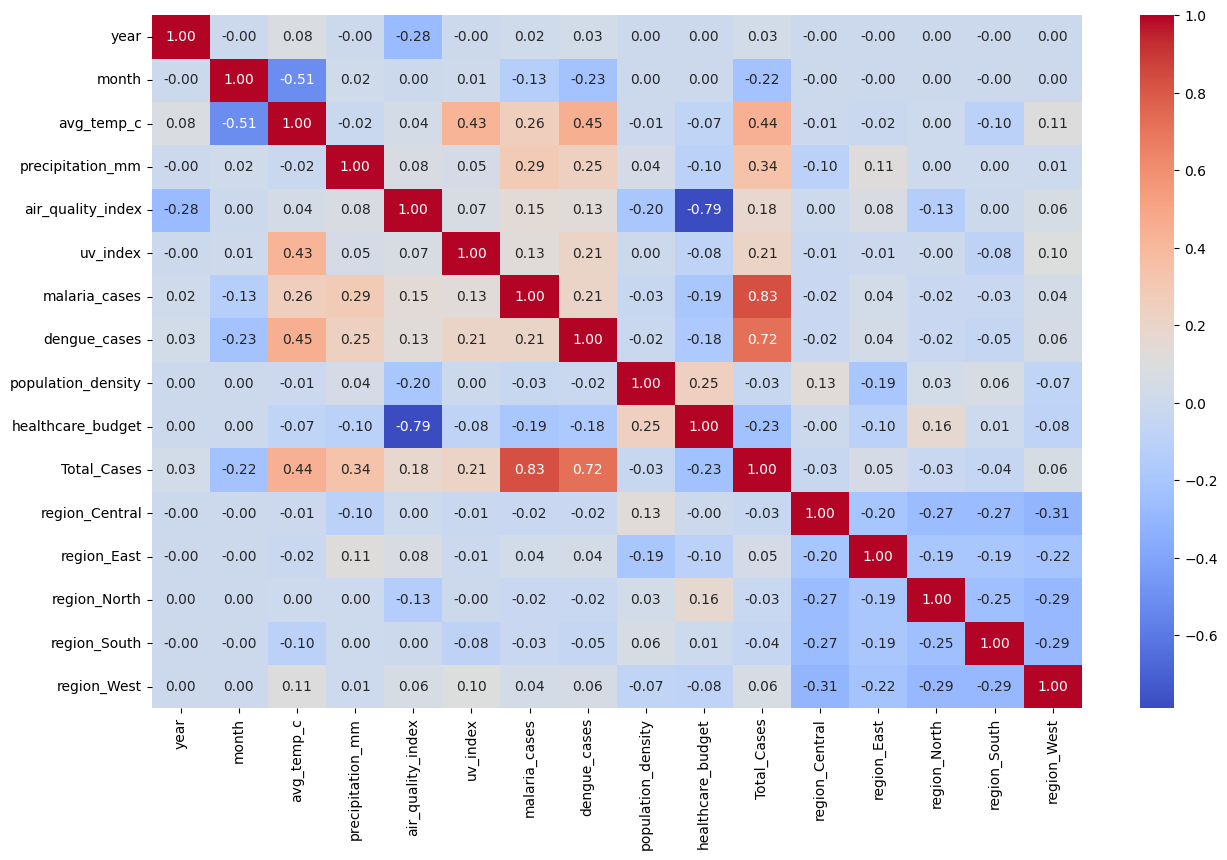

In [214]:
corr_matrix = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**To eliminate unnecessary features from the DataFrame, simplifying it for further analysis or modeling.**

In [215]:
df.drop(['year'], axis=1, inplace= True)
df.drop(['month'], axis=1, inplace= True)
df.drop(['precipitation_mm'],axis=1,inplace=True)
df.drop(['air_quality_index'], axis=1, inplace= True)

# df.drop(['avg_temp_c'],axis=1,inplace=True
# # #df.drop(['country'], axis=1, inplace= True)
#df.drop(['region'], axis=1, inplace= True)
df.drop(['population_density'], axis=1, inplace= True)
# df.drop(['air_quality_index'], axis=1, inplace= True)
# df.drop(['uv_index'], axis=1, inplace= True)
#df.drop(['month'], axis=1, inplace= True)
# df.drop(['healthcare_budget'], axis=1, inplace= True)

# # df

# **Outlier Detection**

**To visualize the distribution, quartiles, and outliers of each feature in the dataset**.



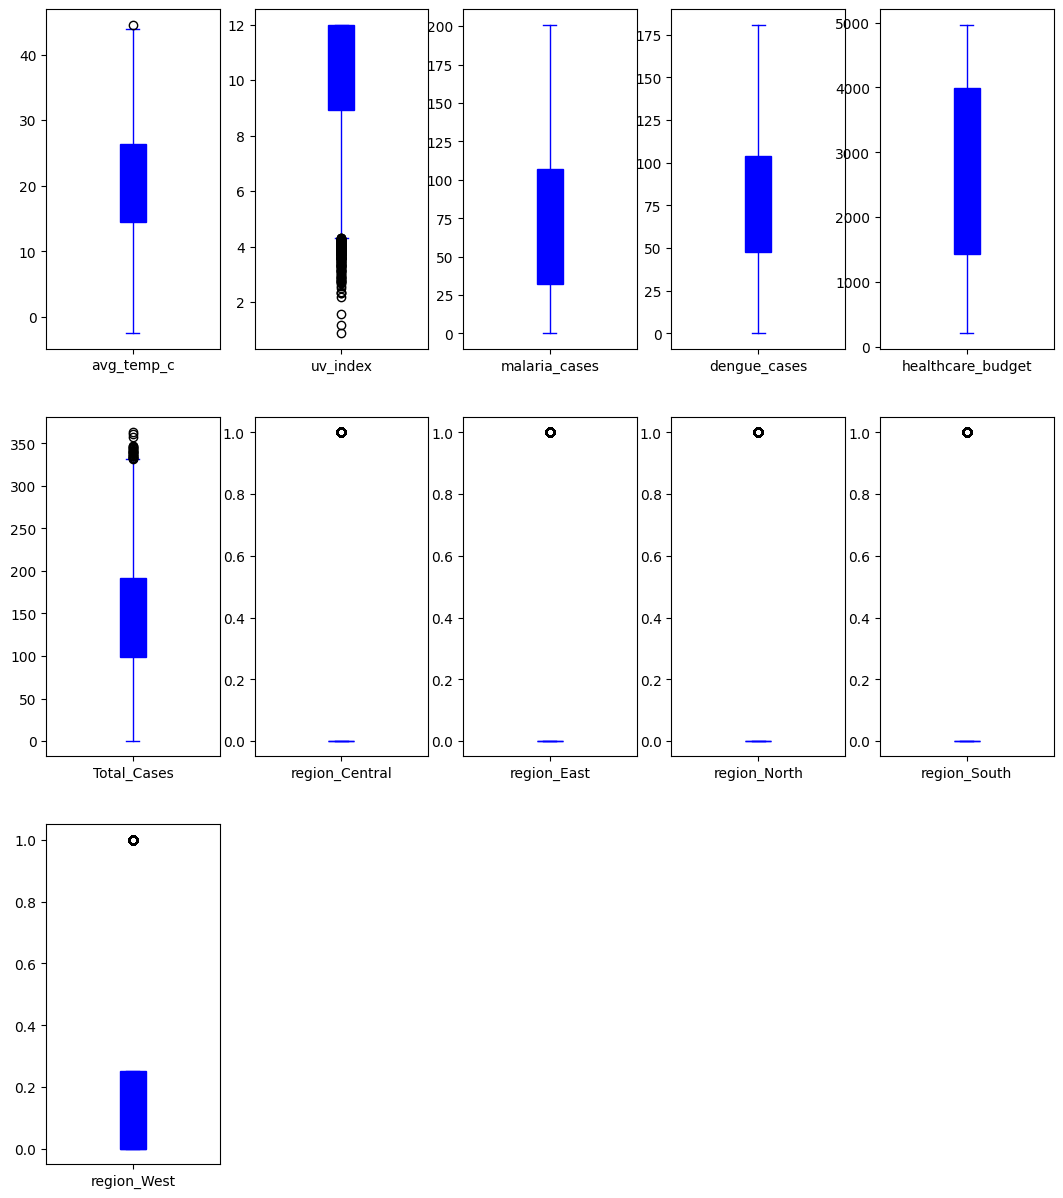

In [216]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

In [217]:
# import pandas as pd

# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_cleaned

# # Columns with outliers to clean
# columns_to_clean =['uv_index']

# for col in columns_to_clean:
#     df = remove_outliers_iqr(df, col)



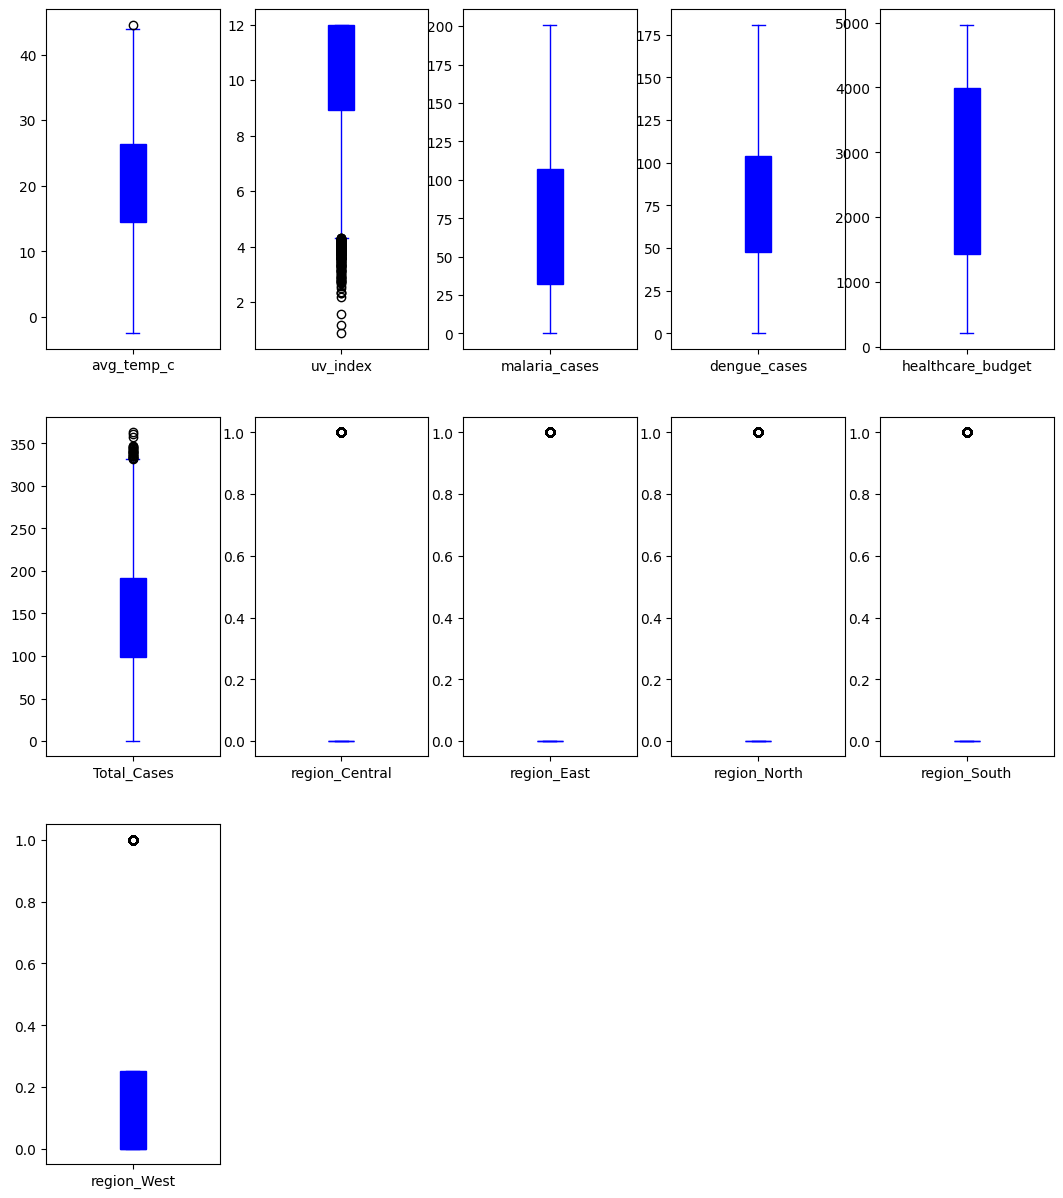

In [218]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

# **Feature Engineering**

**To get the combined disease burden per entry for analysis**

In [219]:
# df['Total_Cases'] = df['malaria_cases'] + df['dengue_cases']
# df

**To clean the DataFrame after combining both into Total_Cases.**



In [220]:
# df.drop(['malaria_cases'], axis=1, inplace= True)
# df.drop(['dengue_cases'], axis=1, inplace= True)

**To handle skewness in the data and provide a clear visualization of how each feature's distribution changes after log transformation.**



/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


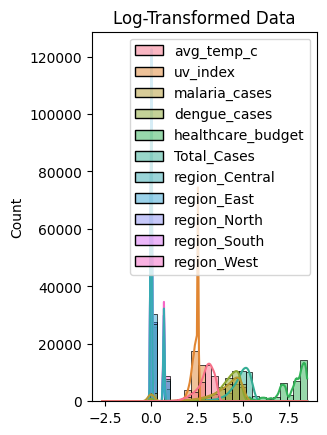

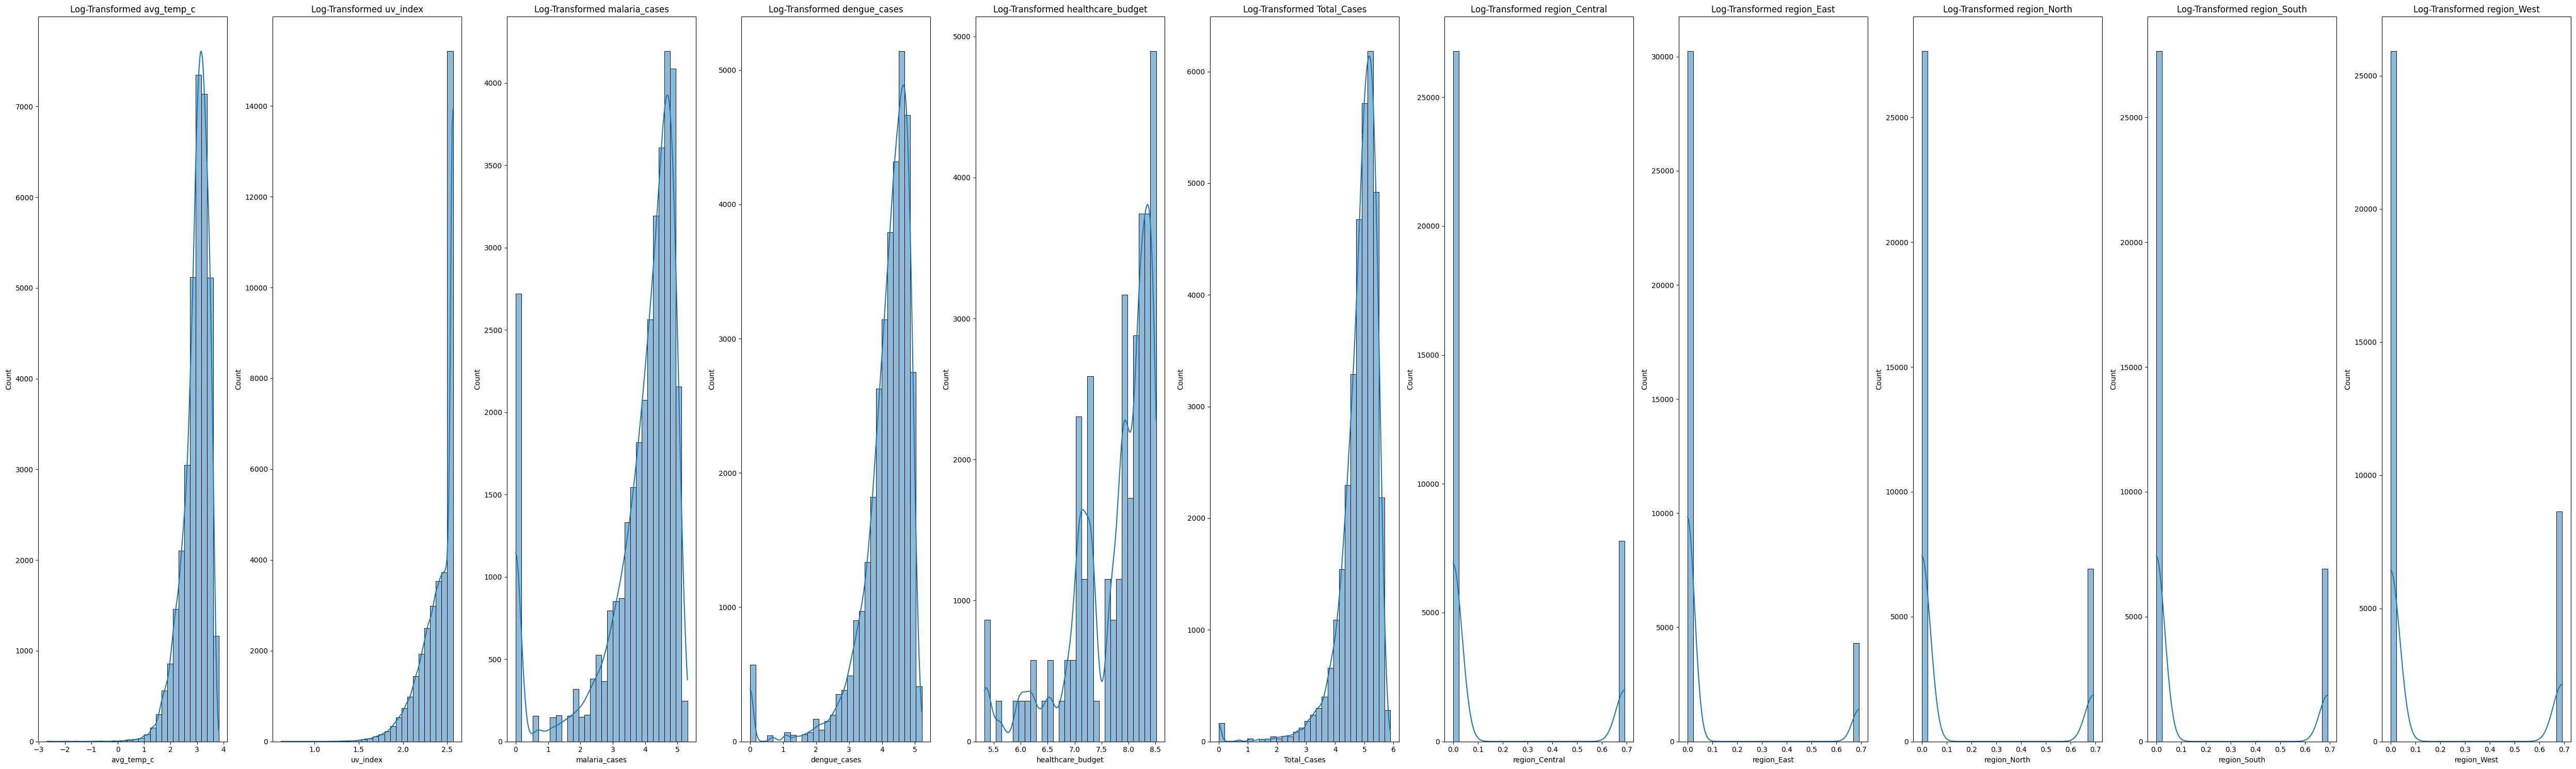

In [221]:
#To handle skewness
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

# **Feature-Target Split**

**To prepare the data for model training by splitting it into features (X) and target (y).**



In [222]:
df

,avg_temp_c,uv_index,malaria_cases,dengue_cases,healthcare_budget,Total_Cases,region_Central,region_East,region_North,region_South,region_West
0,28.132468,12.000000,53,145,1068,198,1.0,0.0,0.0,0.0,0.0
1,30.886500,12.000000,132,48,1068,180,1.0,0.0,0.0,0.0,0.0
2,31.366433,12.000000,34,80,1068,114,1.0,0.0,0.0,0.0,0.0
3,28.481870,9.395894,23,133,1068,156,1.0,0.0,0.0,0.0,0.0
4,26.890370,9.935726,39,74,1068,113,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
34555,13.040751,12.000000,149,36,399,185,0.0,1.0,0.0,0.0,0.0
34556,9.811456,8.432640,56,47,399,103,0.0,1.0,0.0,0.0,0.0
34557,12.308443,8.034754,104,22,399,126,0.0,1.0,0.0,0.0,0.0
34558,20.197689,12.000000,142,66,399,208,0.0,1.0,0.0,0.0,0.0


In [223]:
# Define target and features (include the new date features)
# Define target and features (include the new date features)
X = df.drop(columns=['malaria_cases','dengue_cases'])
y = df[['malaria_cases','dengue_cases']]

# **Train-Test Split**

**To set up the necessary tools and models for training, evaluating, and comparing different regression algorithms**

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

**To prepare the data for model training by dividing it into training and testing sets for evaluation**

In [225]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Selection & Training**

**To evaluate and display the performance of a model based on key regression metrics.**



In [226]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n📊 {model_name}")
    print(f"R²: {r2:.4f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")

**To define the models that will be trained and evaluated on the dataset.**



In [227]:
# Models to train
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "XGBoost Regressor": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
}

**To iterate over all the models, train them on the dataset, and evaluate their performance on the test set.**



In [228]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, name)


📊 Linear Regression
R²: 0.6233 | MAE: 20.83 | RMSE: 25.40

📊 Random Forest
R²: 0.5946 | MAE: 21.12 | RMSE: 26.35

📊 Decision Tree
R²: 0.2301 | MAE: 28.15 | RMSE: 36.31

📊 KNN Regressor
R²: 0.5600 | MAE: 21.85 | RMSE: 27.45

📊 XGBoost Regressor
R²: 0.6139 | MAE: 20.84 | RMSE: 25.71
